In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
tit=pd.read_excel("titanic3.xls")

In [3]:
tit.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
tit.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [5]:
tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


In [6]:
tit.describe().T

,count,mean,std,min,25%,50%,75%,max
pclass,1309.0,2.294882,0.837836,1.0000,2.0000,3.0000,3.000,3.0000
survived,1309.0,0.381971,0.486055,0.0000,0.0000,0.0000,1.000,1.0000
age,1046.0,29.881135,14.413500,0.1667,21.0000,28.0000,39.000,80.0000
sibsp,1309.0,0.498854,1.041658,0.0000,0.0000,0.0000,1.000,8.0000
parch,1309.0,0.385027,0.865560,0.0000,0.0000,0.0000,0.000,9.0000
fare,1308.0,33.295479,51.758668,0.0000,7.8958,14.4542,31.275,512.3292
body,121.0,160.809917,97.696922,1.0000,72.0000,155.0000,256.000,328.0000


In [7]:
tit.isnull().sum().sort_values(ascending=False)

body         1188
cabin        1014
boat          823
home.dest     564
age           263
embarked        2
fare            1
ticket          0
parch           0
sibsp           0
sex             0
name            0
survived        0
pclass          0
dtype: int64

In [8]:
tit.drop(["cabin","boat","body","home.dest","name","ticket"],axis=1,inplace=True)

In [9]:
tit.columns

Index(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

In [10]:
tit["age"]=tit["age"].fillna(tit["age"].mean())

In [11]:
tit['age']=tit['age'].astype('int')

In [12]:
tit["fare"]=tit["fare"].fillna(tit["fare"].median())

In [13]:
tit.embarked.value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [14]:
tit['embarked']=tit['embarked'].fillna('S')

In [15]:
tit.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [16]:
tit.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29,0,0,211.3375,S
1,1,1,male,0,1,2,151.5500,S
2,1,0,female,2,1,2,151.5500,S
3,1,0,male,30,1,2,151.5500,S
4,1,0,female,25,1,2,151.5500,S


In [17]:
tit["embarked"].isnull().sum()

0

In [18]:
tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
pclass      1309 non-null int64
survived    1309 non-null int64
sex         1309 non-null object
age         1309 non-null int32
sibsp       1309 non-null int64
parch       1309 non-null int64
fare        1309 non-null float64
embarked    1309 non-null object
dtypes: float64(1), int32(1), int64(4), object(2)
memory usage: 76.8+ KB


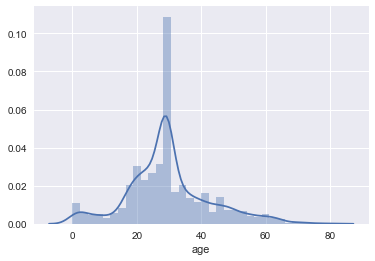

In [19]:
sns.distplot(tit["age"])

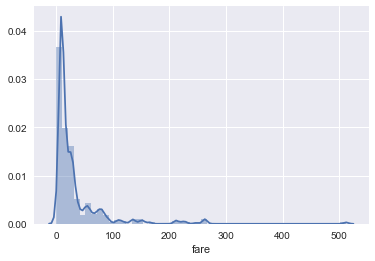

In [20]:
sns.distplot(tit.fare)

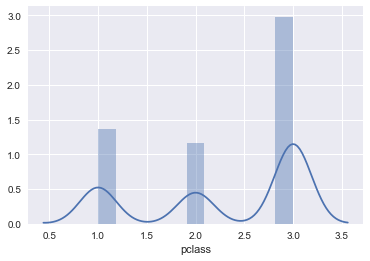

In [21]:
sns.distplot(tit["pclass"])

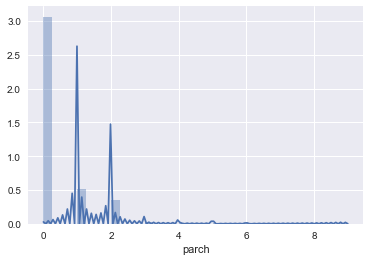

In [22]:

sns.distplot(tit["parch"])

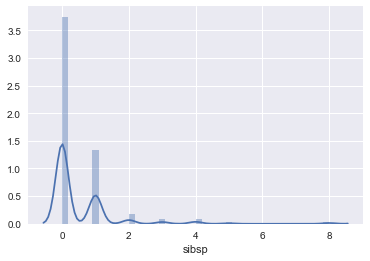

In [23]:
sns.distplot(tit["sibsp"])

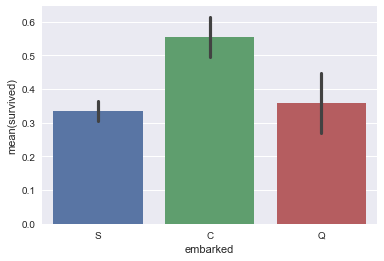

In [24]:
sns.barplot(x="embarked", y="survived", data=tit)

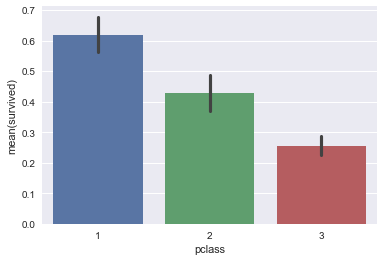

In [25]:
sns.barplot(x="pclass", y="survived", data=tit)

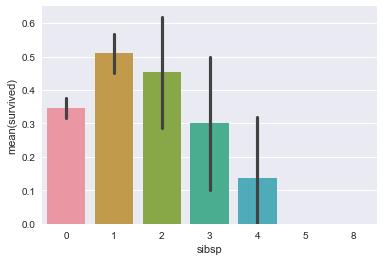

In [26]:
sns.barplot(x="sibsp", y="survived", data=tit)

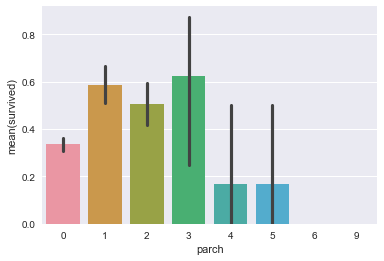

In [27]:
sns.barplot(x="parch", y="survived", data=tit)

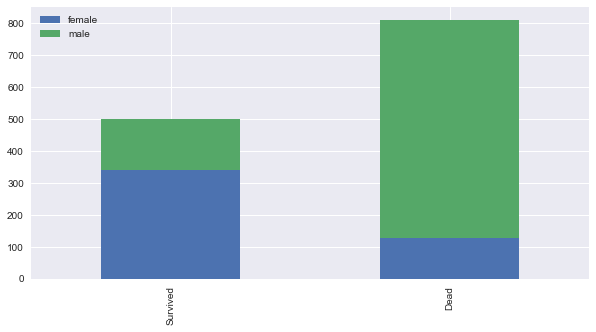

In [28]:
survived_sex = tit[tit['survived']==1]['sex'].value_counts()
dead_sex = tit[tit['survived']==0]['sex'].value_counts()
df = pd.DataFrame([survived_sex,dead_sex])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(10,5))

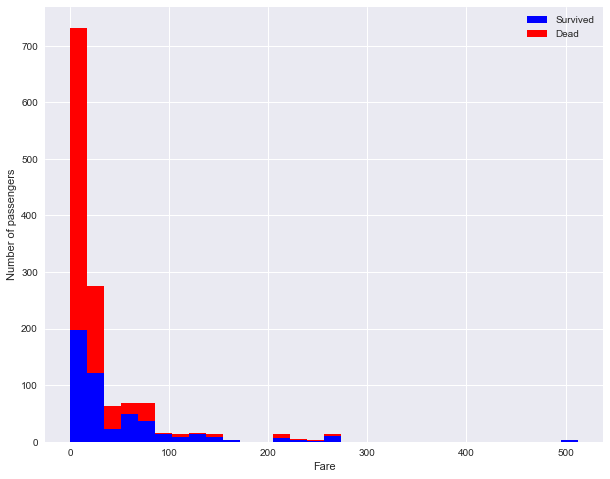

In [29]:
figure = plt.figure(figsize=(10,8))
plt.hist([tit[tit['survived']==1]['fare'],tit[tit['survived']==0]['fare']], 
         stacked=True, color = ['b','r'],bins = 30,label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

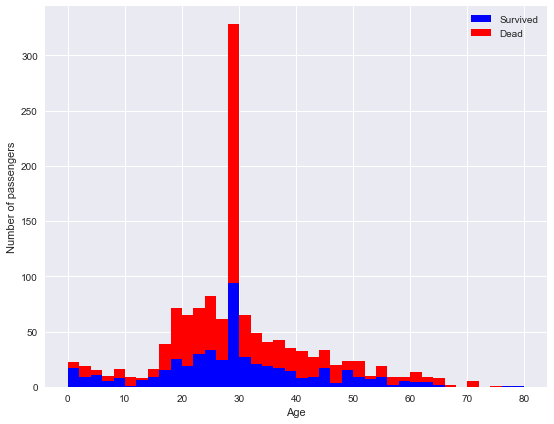

In [30]:
figure = plt.figure(figsize=(9,7))
plt.hist([tit[tit['survived']==1]['age'], tit[tit['survived']==0]['age']], 
         stacked=True, color = ['b','r'],bins = 40,label = ['Survived','Dead'],
         range = (tit['age'].min(),tit['age'].max()))
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

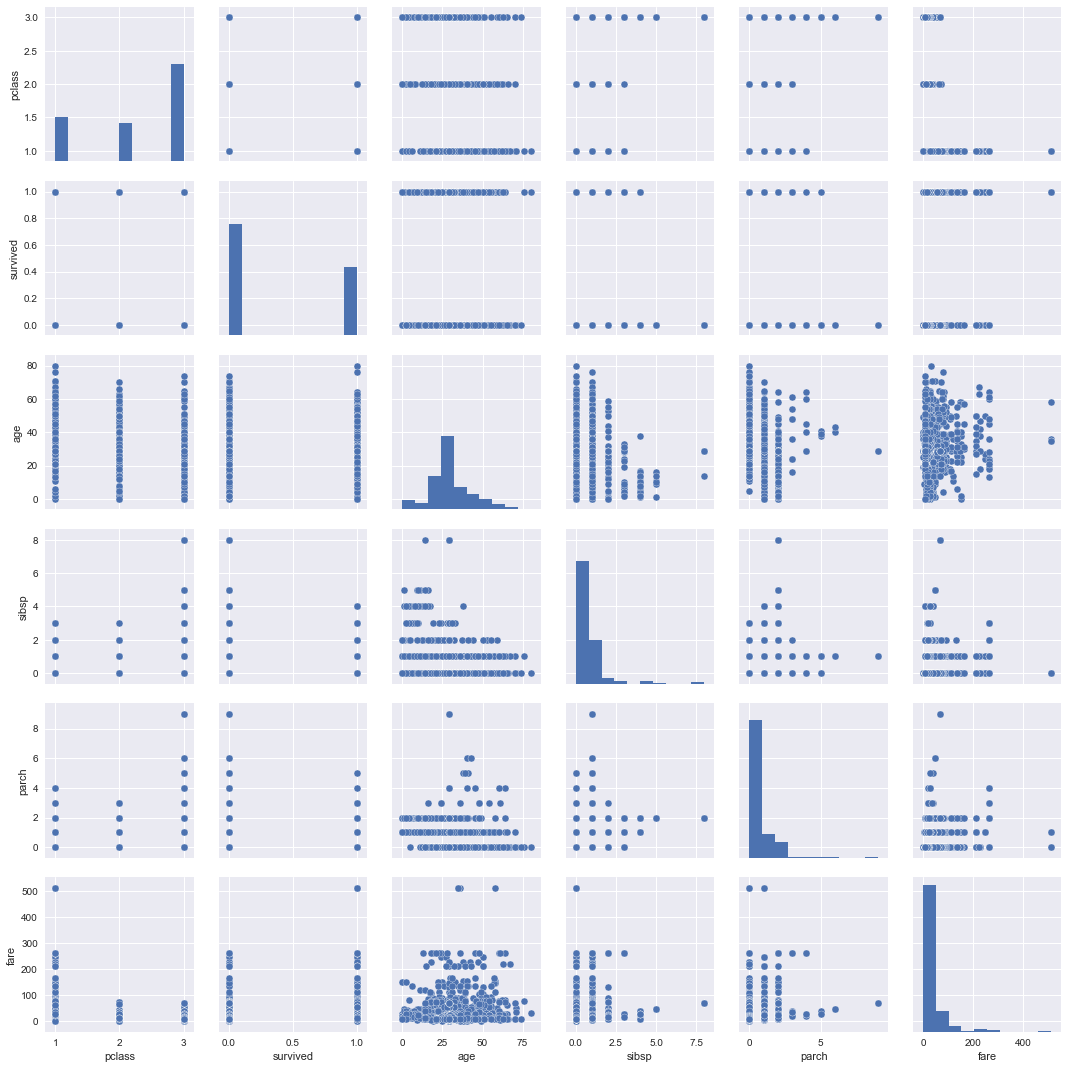

In [31]:
sns.pairplot(tit)

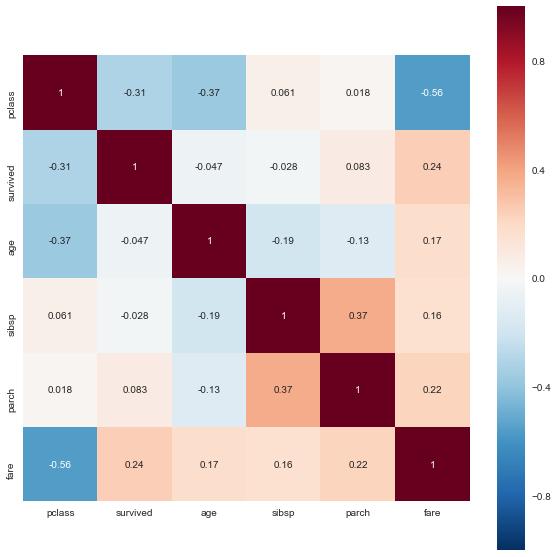

In [32]:
corrmat = tit.corr()
plt.figure(figsize=(10, 10))

sns.heatmap(corrmat, vmax=1.0, square=True, annot=True)


In [33]:
tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
pclass      1309 non-null int64
survived    1309 non-null int64
sex         1309 non-null object
age         1309 non-null int32
sibsp       1309 non-null int64
parch       1309 non-null int64
fare        1309 non-null float64
embarked    1309 non-null object
dtypes: float64(1), int32(1), int64(4), object(2)
memory usage: 76.8+ KB


In [34]:
tit.columns

Index(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

In [35]:
num_col=tit._get_numeric_data()

In [36]:
import statsmodels.formula. api as smf

In [37]:
glm = smf.ols('survived ~ pclass+age+sibsp+parch+fare',num_col).fit()

In [38]:
glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     43.46
Date:                Fri, 03 Nov 2017   Prob (F-statistic):           1.59e-41
Time:                        22:22:41   Log-Likelihood:                -811.59
No. Observations:                1309   AIC:                             1635.
Df Residuals:                    1303   BIC:                             1666.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0105      0.067     15.017      0.000       0.879       1.143
pclass        -0.1909      0.019     -9.910      0.000      -0.229      -0.153
age           -0.0072      0.001     -6.824      0.000      -0.009      -0.005
sibsp         -0.0409      0.013     -3.095      0.002      -0.067      -0.015
parch          0.0429      0.016      2.694      0.007       0.012       0.074
fare           0.0009      0.000      2.800      0.005       0.000       0.001
==============================================================================
Omnibus:                      909.769   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.360
Skew:                           0.455   Prob(JB):                     4.44e-27
Kurtosis:                       1.818   Cond. No.                         360.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
cat_col = tit.drop(['pclass','age','sibsp','parch','fare'],axis=1)

In [40]:
glm1 = smf.ols('survived ~ sex+embarked',cat_col).fit()

In [90]:
glm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     188.8
Date:                Fri, 03 Nov 2017   Prob (F-statistic):          1.09e-101
Time:                        15:35:37   Log-Likelihood:                -676.57
No. Observations:                1309   AIC:                             1361.
Df Residuals:                    1305   BIC:                             1382.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.8640      0.028     30.542      0.000       0.809       0.920
sex[T.male]      -0.5305      0.024    -22.451      0.000      -0.577      -0.484
embarked[T.Q]    -0.2346      0.044     -5.303      0.000      -0.321      -0.148
embarked[T.S]    -0.1692      0.028     -5.991      0.000      -0.225      -0.114
==============================================================================
Omnibus:                       40.443   Durbin-Watson:                   1.658
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.564
Skew:                           0.441   Prob(JB):                     3.47e-10
Kurtosis:                       2.858   Cond. No.                         6.48
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
numerical_features=["pclass","age","sibsp","parch","fare"]
categorical_features=["sex","embarked"]

In [42]:
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis = 1, inplace = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis=1, inplace=True)
    return df

In [43]:
for c_features in categorical_features:
    tit = create_dummies(tit, c_features)


In [44]:
tit.head()

,pclass,survived,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,1,1,29,0,0,211.3375,0,0,1
1,1,1,0,1,2,151.5500,1,0,1
2,1,0,2,1,2,151.5500,0,0,1
3,1,0,30,1,2,151.5500,1,0,1
4,1,0,25,1,2,151.5500,0,0,1


In [45]:
feature_columns = tit.columns.difference(['survived'])
feature_columns

Index(['age', 'embarked_Q', 'embarked_S', 'fare', 'parch', 'pclass',
       'sex_male', 'sibsp'],
      dtype='object')

In [46]:
from sklearn.cross_validation import train_test_split

train_X, test_X, train_y, test_y = train_test_split(tit[feature_columns],
                                                    tit.survived,
                                                    test_size = 0.30,
                                                    random_state=42)

C:\Users\omsai9\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [59]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [73]:
pipe_logit = Pipeline(steps=[('scale', StandardScaler()),
                             ('logit', LogisticRegression())])

params_pipe = {'logit__C': [10, 1, 0.1, 0.01],
               'logit__penalty': ['l1', 'l2'],}

gscv_pipe = GridSearchCV(pipe_logit,
                         param_grid=params_pipe,
                         scoring='accuracy',
                         cv=10, verbose = True)

gscv_pipe.fit(train_X, train_y)


Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.5s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logit', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'logit__C': [10, 1, 0.1, 0.01], 'logit__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy',
       verbose=True)

In [74]:
ypred_1 = gscv_pipe.predict(test_X)

In [75]:
metrics.accuracy_score(test_y, ypred_1)

0.80407124681933839

In [76]:
gscv_pipe.best_params_

{'logit__C': 10, 'logit__penalty': 'l2'}

In [57]:
gscv_pipe.best_estimator_

Pipeline(steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logit', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [58]:
gscv_pipe.grid_scores_

[mean: 0.82809, std: 0.03524, params: {'logit__C': 10, 'logit__penalty': 'l1'},
 mean: 0.82814, std: 0.03521, params: {'logit__C': 10, 'logit__penalty': 'l2'},
 mean: 0.82845, std: 0.03650, params: {'logit__C': 1, 'logit__penalty': 'l1'},
 mean: 0.82809, std: 0.03567, params: {'logit__C': 1, 'logit__penalty': 'l2'},
 mean: 0.82510, std: 0.04032, params: {'logit__C': 0.1, 'logit__penalty': 'l1'},
 mean: 0.82908, std: 0.03694, params: {'logit__C': 0.1, 'logit__penalty': 'l2'},
 mean: 0.81176, std: 0.04452, params: {'logit__C': 0.01, 'logit__penalty': 'l1'},
 mean: 0.82515, std: 0.03992, params: {'logit__C': 0.01, 'logit__penalty': 'l2'}]

In [77]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [98]:
logreg.coef_

array([[-0.0161376 , -0.47645445, -0.45157268,  0.00397109, -0.06546775,
        -0.67173924, -2.33985159, -0.21854966]])

In [99]:
logreg.predict_proba(test_X)

array([[ 0.89965139,  0.10034861],
       [ 0.85189227,  0.14810773],
       [ 0.89026693,  0.10973307],
       [ 0.8902071 ,  0.1097929 ],
       [ 0.89272963,  0.10727037],
       [ 0.7179096 ,  0.2820904 ],
       [ 0.88378832,  0.11621168],
       [ 0.80748296,  0.19251704],
       [ 0.90018706,  0.09981294],
       [ 0.18448231,  0.81551769],
       [ 0.97652281,  0.02347719],
       [ 0.883321  ,  0.116679  ],
       [ 0.32415218,  0.67584782],
       [ 0.89026693,  0.10973307],
       [ 0.89641593,  0.10358407],
       [ 0.44499347,  0.55500653],
       [ 0.83815243,  0.16184757],
       [ 0.42687109,  0.57312891],
       [ 0.10629931,  0.89370069],
       [ 0.91247152,  0.08752848],
       [ 0.40925286,  0.59074714],
       [ 0.69551738,  0.30448262],
       [ 0.87702291,  0.12297709],
       [ 0.68433856,  0.31566144],
       [ 0.82224008,  0.17775992],
       [ 0.31737194,  0.68262806],
       [ 0.83801415,  0.16198585],
       [ 0.35051846,  0.64948154],
       [ 0.42516438,

In [100]:
y_pred = pd.DataFrame({'actual': test_y,
                            'predicted': logreg.predict(test_X)})

In [101]:
y_pred.head()

,actual,predicted
1148,0,0
1049,1,0
982,0,0
808,0,0
1195,0,0


In [102]:
y_pred = y_pred.reset_index()

In [103]:
y_pred.head()

,index,actual,predicted
0,1148,0,0
1,1049,1,0
2,982,0,0
3,808,0,0
4,1195,0,0


In [104]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_pred.actual, y_pred.predicted, [1,0])
cm

array([[110,  59],
       [ 22, 202]])

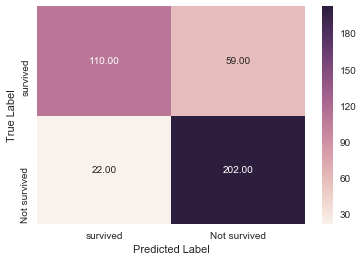

In [105]:
sns.heatmap(cm, annot=True, fmt = '.2f', xticklabels=["survived", "Not survived"], yticklabels = ["survived", "Not survived"])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

In [106]:
score =metrics.accuracy_score(y_pred.actual,y_pred.predicted)

In [107]:
score

0.79389312977099236

In [108]:
score = metrics.recall_score(y_pred.actual,y_pred.predicted)

In [109]:
score

0.65088757396449703

In [110]:
print(logreg.predict_proba(test_X[:1]))

[[ 0.89965139  0.10034861]]


In [111]:
predict_proba_df=pd.DataFrame(logreg.predict_proba(test_X))
predict_proba_df.head()

,0,1
0,0.899651,0.100349
1,0.851892,0.148108
2,0.890267,0.109733
3,0.890207,0.109793
4,0.892730,0.107270


In [112]:
y_pred = pd.concat([y_pred,predict_proba_df],axis =1)

In [113]:
y_pred.head()

,index,actual,predicted,0,1
0,1148,0,0,0.899651,0.100349
1,1049,1,0,0.851892,0.148108
2,982,0,0,0.890267,0.109733
3,808,0,0,0.890207,0.109793
4,1195,0,0,0.892730,0.107270


In [114]:
y_pred.columns=["index","actual","predicted","survived_0","survived_1"]

In [115]:
y_pred.head()

,index,actual,predicted,survived_0,survived_1
0,1148,0,0,0.899651,0.100349
1,1049,1,0,0.851892,0.148108
2,982,0,0,0.890267,0.109733
3,808,0,0,0.890207,0.109793
4,1195,0,0,0.892730,0.107270


In [116]:
from sklearn import metrics

In [117]:
auc_score = metrics.roc_auc_score(y_pred.actual, y_pred.survived_1)
round(float(auc_score), 2)

0.86

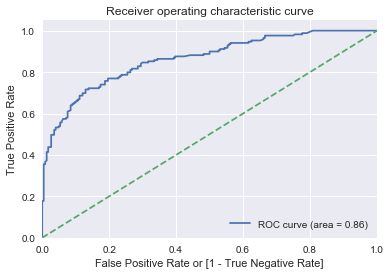

In [119]:
fpr, tpr, thresholds = metrics.roc_curve(y_pred.actual, y_pred.survived_1,
                                            drop_intermediate = False)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

In [120]:
cutoff_prob = thresholds[(np.abs(tpr - 0.8)).argmin()]

In [121]:
cutoff_prob

0.26281404643549428

In [122]:
thresholds[1:10]

array([ 0.93725117,  0.91951137,  0.91477437,  0.91297698,  0.91089302,
        0.90918282,  0.90782402,  0.90730408,  0.89998589])

In [124]:
y_pred['new_labels']=y_pred['survived_1'].map(lambda x: 1 if x>= 0.26 else 0 )

In [125]:
y_pred[1:10]

,index,actual,predicted,survived_0,survived_1,new_labels
1,1049,1,0,0.851892,0.148108,0
2,982,0,0,0.890267,0.109733,0
3,808,0,0,0.890207,0.109793,0
4,1195,0,0,0.892730,0.107270,0
5,240,1,0,0.717910,0.282090,1
6,1118,0,0,0.883788,0.116212,0
7,596,1,0,0.807483,0.192517,0
8,924,0,0,0.900187,0.099813,0
9,65,1,1,0.184482,0.815518,1


In [126]:
metrics.recall_score(y_pred.actual,y_pred.new_labels)

0.79881656804733725

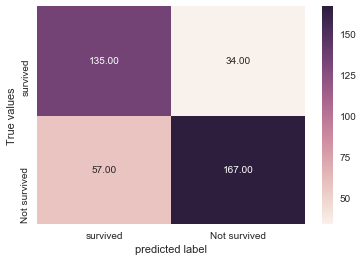

In [127]:
cm = metrics.confusion_matrix(y_pred.actual,
                              y_pred.new_labels, [1,0])
sns.heatmap(cm, annot=True, fmt = '.2f', xticklabels=["survived", "Not survived"], yticklabels = ["survived", "Not survived"])
plt.ylabel('True values') 
plt.xlabel('predicted label')

In [128]:
metrics.accuracy_score(y_pred.actual,y_pred.predicted)

0.79389312977099236

In [129]:
metrics.accuracy_score(y_pred.actual,y_pred.new_labels)

0.76844783715012721

# decision tress

In [130]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz,export
from sklearn.grid_search import GridSearchCV

C:\Users\omsai9\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [131]:
depth_list = list(range(1,20))
for depth in depth_list:
    dt_obj = DecisionTreeClassifier(max_depth = depth)
    dt_obj.fit(train_X,train_y)
    print('depth:',depth , 'accuracy:', metrics.accuracy_score(test_y, dt_obj.predict(test_X)))

depth: 1 accuracy: 0.788804071247
depth: 2 accuracy: 0.758269720102
depth: 3 accuracy: 0.814249363868
depth: 4 accuracy: 0.76844783715
depth: 5 accuracy: 0.75572519084
depth: 6 accuracy: 0.760814249364
depth: 7 accuracy: 0.763358778626
depth: 8 accuracy: 0.745547073791
depth: 9 accuracy: 0.737913486005
depth: 10 accuracy: 0.750636132316
depth: 11 accuracy: 0.748091603053
depth: 12 accuracy: 0.753180661578
depth: 13 accuracy: 0.76844783715
depth: 14 accuracy: 0.750636132316
depth: 15 accuracy: 0.750636132316
depth: 16 accuracy: 0.758269720102
depth: 17 accuracy: 0.735368956743
depth: 18 accuracy: 0.753180661578
depth: 19 accuracy: 0.740458015267


In [132]:
param_grid ={'max_depth': np.arange(3,20)}
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10)
tree.fit(train_X, train_y)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [133]:
tree.best_params_

{'max_depth': 5}

In [134]:
tree.best_score_

0.8067685589519651

In [135]:
tree_final = DecisionTreeClassifier(max_depth=5)
tree_final.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [136]:
depth_list = list(range(1,10))
for depth in depth_list:
    tree1 = DecisionTreeClassifier(max_depth=depth)
    tree1.fit(train_X, train_y)
    print ('tree depth:', depth, 'Accuracy:', metrics.accuracy_score(test_y, tree1.predict(test_X)))
    

tree depth: 1 Accuracy: 0.788804071247
tree depth: 2 Accuracy: 0.758269720102
tree depth: 3 Accuracy: 0.814249363868
tree depth: 4 Accuracy: 0.76844783715
tree depth: 5 Accuracy: 0.748091603053
tree depth: 6 Accuracy: 0.760814249364
tree depth: 7 Accuracy: 0.765903307888
tree depth: 8 Accuracy: 0.745547073791
tree depth: 9 Accuracy: 0.740458015267


In [137]:
tree_test_pred = pd.DataFrame({'actual': test_y, 'predicted': tree_final.predict(test_X)})

In [138]:
tree_test_pred.sample(10)

,actual,predicted
631,0,0
764,0,0
591,1,1
1013,0,0
526,1,0
83,1,0
820,1,1
998,0,0
1094,1,0
294,0,1


In [139]:
metrics.accuracy_score(tree_test_pred.actual, tree_test_pred.predicted)

0.75572519083969469

Bagged Decision Trees

In [185]:
from sklearn.ensemble import BaggingClassifier

In [186]:
param_bag = {'n_estimators': list(range(100, 801, 100)),}

In [187]:
bag_cl = GridSearchCV(estimator=BaggingClassifier(),
                  param_grid=param_bag,
                  cv=5,
                  verbose=True, n_jobs=-1)

In [188]:
bag_cl.fit(train_X,train_y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   24.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=True)

In [189]:
bag_cl.best_params_

{'n_estimators': 100}

In [190]:
bagclm = BaggingClassifier(oob_score=True, n_estimators=100)
bagclm.fit(train_X, train_y)

y_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': bagclm.predict( test_X) } )

In [191]:
metrics.accuracy_score( y_pred.actual, y_pred.predicted )

0.78371501272264632

In [192]:
bagclm.oob_score_

0.7893013100436681

RANDOM FOREST

In [141]:
from sklearn.ensemble import RandomForestClassifier

In [142]:
rad_clf = RandomForestClassifier(oob_score = True ,n_estimators =100)
rad_clf.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [143]:
rad_test_pred = pd.DataFrame({'actual': test_y ,
                             'predicted': rad_clf.predict( test_X ) } )

In [144]:
metrics.accuracy_score( rad_test_pred.actual, rad_test_pred.predicted )

0.78880407124681939

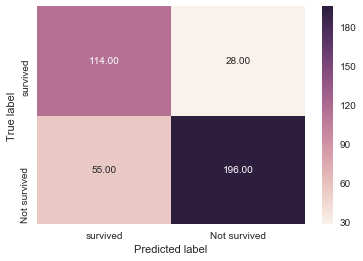

In [145]:
tree_cm = metrics.confusion_matrix(rad_test_pred.predicted ,rad_test_pred.actual,[1,0])
sns.heatmap(tree_cm, annot=True, fmt='.2f', 
            xticklabels= ['survived','Not survived'], yticklabels=['survived','Not survived'])

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [146]:
indices = np.argsort(rad_clf.feature_importances_)[::-1]

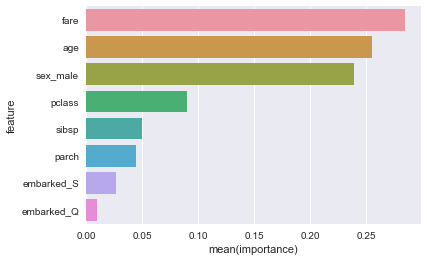

In [147]:
indices = np.argsort(rad_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_X.shape[1]):
    feature_rank.loc[f] = [f+1,
                         train_X.columns[indices[f]],
                         rad_clf.feature_importances_[indices[f]]]
sn.barplot( y = 'feature', x = 'importance', data = feature_rank )
plt.show()

Boosting

adaBoosting

In [148]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [149]:
paragrid_ada = {'n_estimators': [100, 200, 400, 600, 800],
               'learning_rate': [10**x for x in range(-3, 3)]}

In [150]:
from sklearn.grid_search import GridSearchCV
ada = GridSearchCV(estimator=AdaBoostClassifier(),
                  param_grid=paragrid_ada,
                  cv=5,
                  verbose=True, n_jobs=-1)

In [151]:
ada.fit(train_X, train_y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.0min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 400, 600, 800], 'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=True)

In [152]:
ada.best_params_

{'learning_rate': 1, 'n_estimators': 100}

In [153]:
ada_clf = AdaBoostClassifier(learning_rate=1, n_estimators=100)

In [154]:
ada_clf.fit(train_X, train_y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
          n_estimators=100, random_state=None)

In [155]:
ada_test_pred = pd.DataFrame({'actual': test_y,
                            'predicted': ada_clf.predict(test_X)})

In [156]:
metrics.accuracy_score(ada_test_pred.actual, ada_test_pred.predicted)

0.79643765903307884

gradientboosting

In [158]:
param_test1 = {'n_estimators': [100, 200, 400, 600, 800],
              'max_depth': list(range(1,10))}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500, min_samples_leaf=50,
                                                               max_features='sqrt',subsample=0.8, random_state=10), 
                        param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

In [159]:
gsearch1.fit(train_X, train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=50,
              min_samples_split=500, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=10,
              subsample=0.8, verbose=0, warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'n_estimators': [100, 200, 400, 600, 800], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [160]:
gsearch1.best_params_

{'max_depth': 2, 'n_estimators': 800}

In [161]:
gbm = GradientBoostingClassifier(learning_rate=1, min_samples_split=500, min_samples_leaf=50,max_depth=2, n_estimators=800,
                                                               max_features='sqrt',subsample=0.8, random_state=10)

In [162]:
gbm.fit(train_X, train_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1, loss='deviance', max_depth=2,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=50,
              min_samples_split=500, min_weight_fraction_leaf=0.0,
              n_estimators=800, presort='auto', random_state=10,
              subsample=0.8, verbose=0, warm_start=False)

In [163]:
gbm_test_pred = pd.DataFrame({'actual': test_y,
                            'predicted': gbm.predict(test_X)})

In [164]:
metrics.accuracy_score(gbm_test_pred.actual, gbm_test_pred.predicted)

0.77608142493638677

NaviesBayes

In [165]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics  
from sklearn.grid_search import GridSearchCV

In [166]:
nb_clf = GaussianNB()
nb_clf.fit(train_X, train_y)

GaussianNB(priors=None)

In [169]:
metrics.accuracy_score(test_y, nb_clf.predict(test_X))

0.74300254452926207

KNN

In [172]:
from sklearn.neighbors import KNeighborsClassifier

In [173]:
knn_params = {'n_neighbors': [3,5,7,9,11]}
knn_clf = GridSearchCV(KNeighborsClassifier(),
                      knn_params,
                      cv=5,
                      scoring='accuracy')

In [174]:
knn_clf.fit(train_X, train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [3, 5, 7, 9, 11]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [175]:
knn_clf.best_params_

{'n_neighbors': 7}

In [176]:
knn_clf.best_score_

0.7063318777292577

In [178]:
knn_clf_new = KNeighborsClassifier(n_neighbors=7)

In [179]:
knn_clf_new.fit(train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [180]:
knn_cm = metrics.confusion_matrix(test_y, knn_clf_new.predict(test_X))

In [182]:
metrics.accuracy_score(test_y, knn_clf_new.predict(test_X))

0.65648854961832059